<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/Pre%C3%A7o_de_Im%C3%B3veis_em_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp" height="75px"></p>

**by: [João Ataíde](https://www.joaoataide.com)**
#**Preço de Imóveis em São Paulo**


---


<p align="center"><img src="https://static.wixstatic.com/media/bdd7cb_c37cf789f470415781495054582faa05~mv2.jpg"></p>

Contextualização

##Importando Dados e Bibliotecas

In [1]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importar bibliotecar de modelagem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# configurar a visualização
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Para importar dos dados, será necessário instalar algumas bibliotecas, baixando assim diretamento do Kaggle, [neste link](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019), tais dados foram disponibilizados publicamente pela startup OpenImob.

###Importando dados do Kaggle-

In [2]:
!pip install kaggle -q

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jvataide","key":"c5cd70088c4ebfbca19677aaa30e8e84"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d argonalyst/sao-paulo-real-estate-sale-rent-april-2019

  0% 0.00/206k [00:00<?, ?B/s]
100% 206k/206k [00:00<00:00, 44.8MB/s]


In [6]:
!ls

kaggle.json  sample_data  sao-paulo-real-estate-sale-rent-april-2019.zip


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('sao-paulo-real-estate-sale-rent-april-2019.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

## Dados de Imóveis

Os dados usados aqui foram obtidos 


In [8]:
df = pd.read_csv("sao-paulo-real-estate-sale-rent-april-2019.zip")

In [9]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [10]:
print("Número de Entradas: ",df.shape[0])
print("Número de Variáveis: ",df.shape[1])

Número de Entradas:  13640
Número de Variáveis:  16


###Dicionário de Variáveis

###Mudando o Nome do Bairro

In [11]:
#Copiar o dataset
df_clean = df.copy()

In [12]:
# Limpar os nomes do bairros
df_clean['District'] = df_clean['District'].apply(lambda x: x.split('/')[0])

# ver as 5 primeiras entradas
df_clean.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim,rent,apartment,-23.525025,-46.482436


In [26]:
df_clean.tail()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara,sale,apartment,-23.652060,-46.637046
13639,161987,0,44,2,1,0,1,0,0,0,0,Jardim Ângela,sale,apartment,-23.613391,-46.523109


##Análise Exploratória

In [16]:
#Contar valores ausente
df_clean.isnull().mean()

Price               0.0
Condo               0.0
Size                0.0
Rooms               0.0
Toilets             0.0
Suites              0.0
Parking             0.0
Elevator            0.0
Furnished           0.0
Swimming Pool       0.0
New                 0.0
District            0.0
Negotiation Type    0.0
Property Type       0.0
Latitude            0.0
Longitude           0.0
dtype: float64

Fazendo o cálculo dos valores ausente, foi possível notar que o dataset diponibilizado já estava limpo.

In [17]:
#Quais tipos de dados
df_clean.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

Com todos os tipos estabelecidos corretamento, podemos análisas então o  valores únicos do dataset e as estatísticas básicas.




In [24]:
#Valores únicos
df_clean.nunique().sort_values(ascending = False)

Longitude           8451
Latitude            8405
Price               1881
Condo               1415
Size                 339
District              96
Parking               10
Toilets                8
Rooms                  8
Suites                 7
Negotiation Type       2
New                    2
Swimming Pool          2
Furnished              2
Elevator               2
Property Type          1
dtype: int64

In [25]:
df_clean.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


Além disso, podemos analisas as variáveis categóricas, começando com o balancemaneot dos tipos de negociação.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


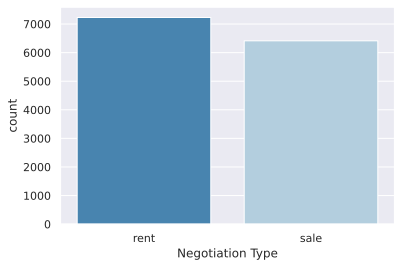

In [36]:
#plotar balanceamento
sns.countplot(df_clean['Negotiation Type'], palette="Blues_r" )
plt.show()


In [46]:
print("Proporção entre os inadimplentes (%)")
df_clean['Negotiation Type'].value_counts()/df_clean.shape[0]*100

Proporção entre os inadimplentes (%)


rent    52.991202
sale    47.008798
Name: Negotiation Type, dtype: float64

Vendo que a variável tipo de negociação está balanceda, pode então avaliar a então os distritos.

In [48]:
df_clean.District.value_counts()

Moema              293
Mooca              288
Brás               255
Brooklin           250
Bela Vista         250
                  ... 
Jardim São Luis     44
São Rafael          44
Grajaú              37
São Domingos        35
Perus               30
Name: District, Length: 96, dtype: int64

O dataset possui 96 distritos, sendo então a Moema como maior quantidade de imóveis e a Perus com menor quantidade.


No então, ficou a dúvida de qual a distribuição do preço em relação ao tipo de negtociação.

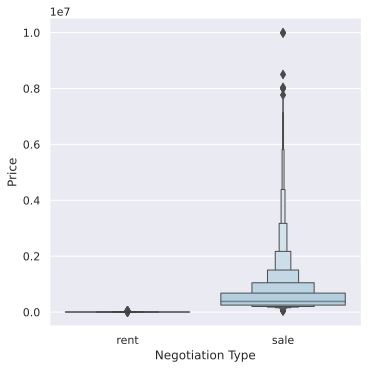

In [53]:
ax = sns.catplot(x = 'Negotiation Type', y = 'Price', kind = 'boxen', palette="Blues_r",
                data = df_clean)

In [55]:
#Relação do tipo de negociação com o preço
sns.scatterplot(x = 'Condo', y = 'Price', hue = 'Negotiation Type', palette="Blues_r", data = df_clean)

<Figure size 864x576 with 0 Axes>

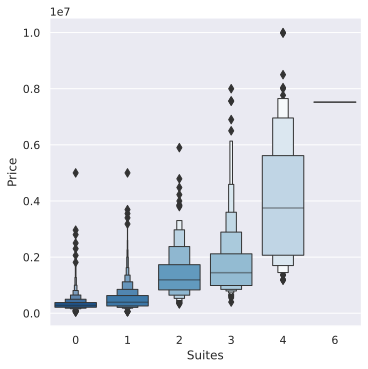

In [57]:
# Relação do preço com o número de suites
plt.figure(figsize = (12,8))
ax = sns.catplot(x = 'Suites', y = 'Price',data = df_clean[df_clean['Negotiation Type'] == 'sale'], palette="Blues_r", kind = 'boxen');

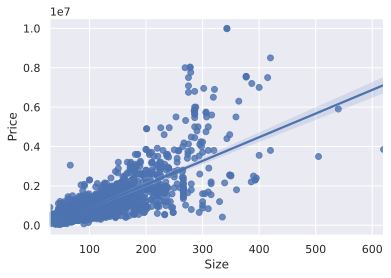

In [63]:
#Relação do preço e tamanho do imóvel
sns.regplot(x = 'Size', y = 'Price',data = df_clean[df_clean['Negotiation Type'] == 'sale'], si);

##Conclusão